연아분산 연아가 은퇴하니 메달이 분산되다.

# 1. 로지스틱 회귀분석(Logistic Regression)이란?
* 로지스틱 회귀분석은 회귀분석을 분류에 이용한 방법
* 종속변수 y가 2개의 값을 가진 범주형 변수일 때 사용 가능
*  예) 남자 or 여자, 개 or 고양이와 같은 이진분류(binary classification)
* ‘어떤 사건이 발생할 확률과 발생하지 않을 확률’로 나누어서 예측

# 2. 로지스틱 회귀분석의 변수 ***
* 로지스틱 회귀분석은 종속변수가 속할 수 있는 집단이 두 개로 이진 분류가 기본
* 세 개 이상의 집단을 분류하는 경우 이를 ‘다중 로지스틱 회귀분석’
* 회귀분석은독립변수가 연속형이면서 종속변수가범주형일 때 가능하다. 만약독립변수가 범주형일 경우에는그 범주형 독립변수를 더미변수로 변환하면 가능
* 로지스틱 회귀분석은 독립변수가 어떤 값을 가지든 상관없이 종속변수는 확률값을 가진다. 따라서 로지스틱 회귀분석의 종속변수는 항상 ‘0과 1’ 사이의 값을 가지는데，
* 이를 위해 **오즈(Odds) ， 로짓(Logit) 변환， 그리고 시그모이드 함수**같은 개념이 등장


# 3. 로지스틱 회귀 분석 실습 (타이타닉 데이터 생존자 예측)
* 종속변수(Target) = Survived
* 독립변수 = Pclass, Name, Sex, SibSp, Parch, Ticket, Fare, Cabin, Embarked

> 필수 패키지 로드

In [2]:
# Data input, assesment : 데이터 불러들이기, 확인하는 과정 

install.packages("descr")
install.packages("VIM")
install.packages("scales")


library(readr)           # Data input with readr::read_csv()
library(descr)           # descr::CrossTable() - 범주별 빈도수, 비율 수치로 확인

# Visualization
library(VIM)             # Missing values assesment used by VIM::aggr()
library(ggplot2)         # Used in almost visualization 
library(RColorBrewer)    # plot의 color 설정 
library(scales)          # plot setting - x, y 축 설정

# Feature engineering, Data Pre-processing
# library(tidyverse)     # dplyr, ggplot2, purrr, etc... 
library(dplyr)           # Feature Engineering & Data Pre-processing 
library(purrr)           # Check missing values 
library(tidyr)           # tidyr::gather() 

# Model generation  
# library(randomForest)    # For Random Forest Modeling


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘zoo’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘Rcpp’, ‘laeken’, ‘ranger’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘dplyr’


The following obj

In [3]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#

multiplot <- function(..., plotlist = NULL, file, cols = 1, layout = NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

> 1) 데이터 로드

In [4]:
full <- read.csv("https://raw.githubusercontent.com/haram4th/ADsP/main/titanic.csv")
head(full, 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


> 2) 데이터 전처리
>> <dl><dt>(1) 데이터 정제 과정</dt>
<dd><li>결측값 처리</li></dd>
<dd><li>이상값 처리</li></dd>


>> <dt>(2) 분석 변수 처리 과정</dt>
<dd><li>변수 선택</li></dd>
<dd><li>차원 축소</li></dd>
<dd><li>요약변수 생성</li></dd>
<dd><li>파생변수 생성</li></dd>
<dd><li>변수 변환</li></dd>
<dd><li>클래스 불균형(불균형 데이터)처리</li></dd>

</dl>


> 명목형 변수를 factor형으로 변환

In [5]:
full <- full %>%
  dplyr::mutate(Survived = factor(Survived),
                Pclass   = factor(Pclass, ordered = T),
                Name     = factor(Name),
                Sex      = factor(Sex),
                Ticket   = factor(Ticket),
                Cabin    = factor(Cabin),
                Embarked = factor(Embarked))

> 탐색적 데이터 분석 (EDA : Exploratory data analysis)


> 2-1) 결측값 처리 Amelia 패키지

In [7]:
install.packages("Amelia")

library(Amelia)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [8]:
str(full)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [9]:
summary(full)

  PassengerId    Survived Pclass                                     Name    
 Min.   :  1.0   0:549    1:216   Abbing, Mr. Anthony                  :  1  
 1st Qu.:223.5   1:342    2:184   Abbott, Mr. Rossmore Edward          :  1  
 Median :446.0            3:491   Abbott, Mrs. Stanton (Rosa Hunt)     :  1  
 Mean   :446.0                    Abelson, Mr. Samuel                  :  1  
 3rd Qu.:668.5                    Abelson, Mrs. Samuel (Hannah Wizosky):  1  
 Max.   :891.0                    Adahl, Mr. Mauritz Nils Martin       :  1  
                                  (Other)                              :885  
     Sex           Age            SibSp           Parch             Ticket   
 female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000   1601    :  7  
 male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   347082  :  7  
              Median :28.00   Median :0.000   Median :0.0000   CA. 2343:  7  
              Mean   :29.70   Mean   :0.523   Mean   :0.3816   3


 Variables sorted by number of missings: 
    Variable Count
         Age   177
 PassengerId     0
    Survived     0
      Pclass     0
        Name     0
         Sex     0
       SibSp     0
       Parch     0
      Ticket     0
        Fare     0
       Cabin     0
    Embarked     0


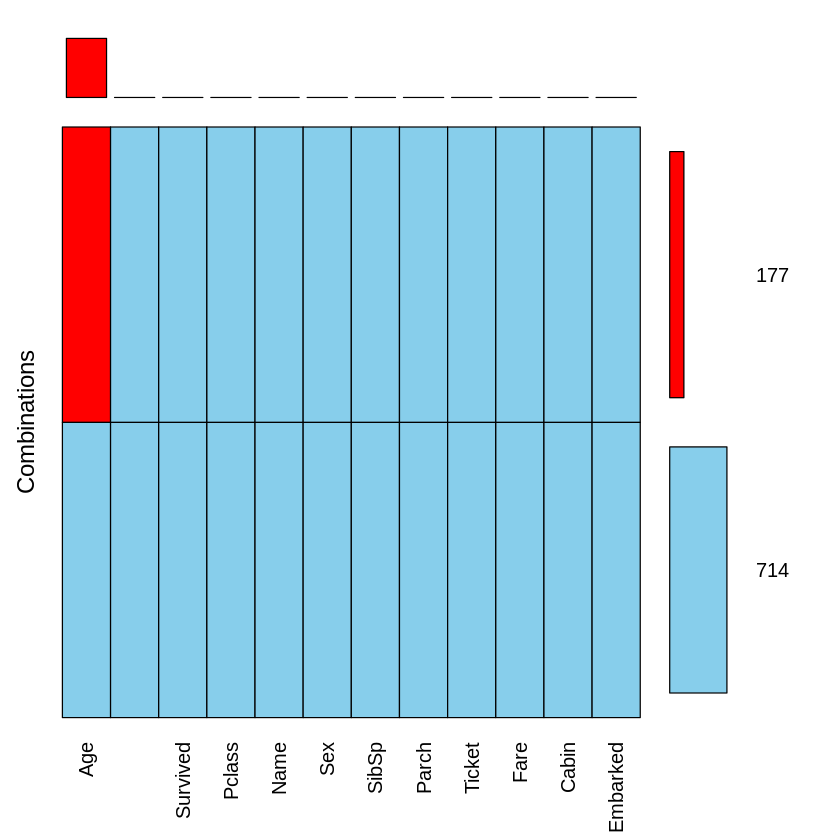

In [10]:
VIM::aggr(full, prop = FALSE, combined = TRUE, numbers = TRUE,
          sortVars = TRUE, sortCombs = TRUE)

> 결측치 비율 구하기

In [11]:
full %>%
  dplyr::summarize_all(funs(sum(is.na(.))/n()))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0.1986532,0,0,0,0,0,0


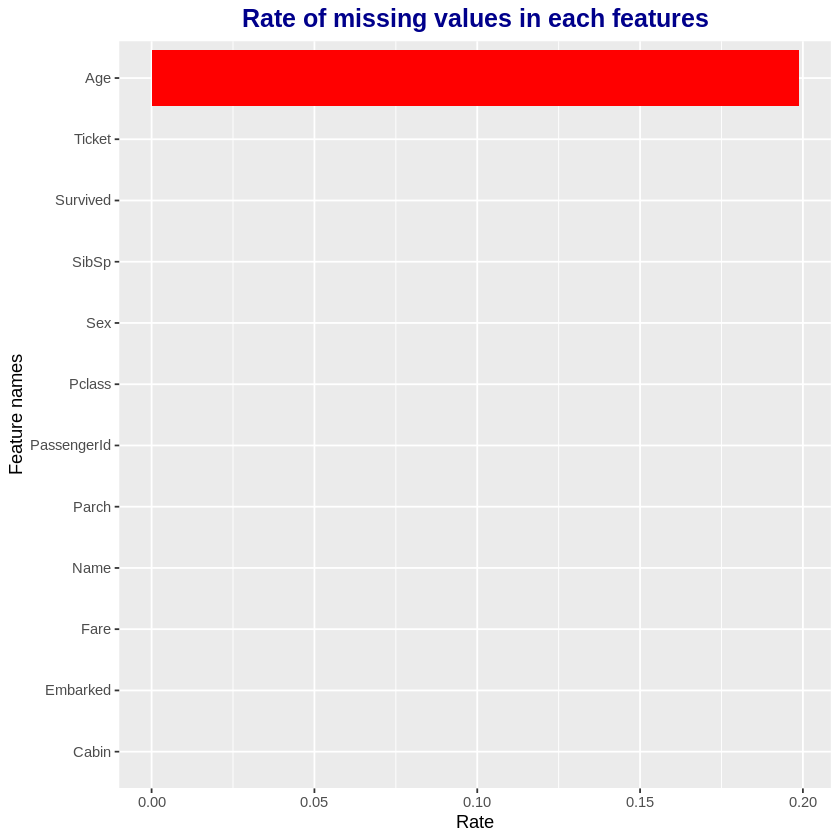

In [12]:
# 각 feature의 결측치 비율 계산 -> Data Frame 속성 but 1행 12열 구조로 되어있음.
missing_values <- full %>%
  dplyr::summarize_all(funs(sum(is.na(.))/n()))

# 위에서 구한 missing_values를 12X2 data frame 으로 생성 
missing_values <- tidyr::gather(missing_values,
                                key = "feature", value = "missing_pct")

# missing_values를 이용한 시각화 
missing_values %>% 
  # Aesthetic setting : missing_pct 내림차순으로 정렬  
  ggplot(aes(x = reorder(feature, missing_pct), y = missing_pct)) +
  # Bar plot 
  geom_bar(stat = "identity", fill = "red") +
  # Title generation 
  ggtitle("Rate of missing values in each features") +
  # Title detail setting 
  theme(plot.title = element_text(face = "bold",    # 글씨체 
                                  hjust = 0.5,      # Horizon(가로비율) = 0.5
                                  size = 15, color = "darkblue")) +
  # x, y axis label setting 
  labs(x = "Feature names", y = "Rate") + 
  # Plot의 x, y축 변환 
  coord_flip()

# Age에 결측값이 177개 있음

In [13]:
sum(is.na(full$Age))

[1] 177

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


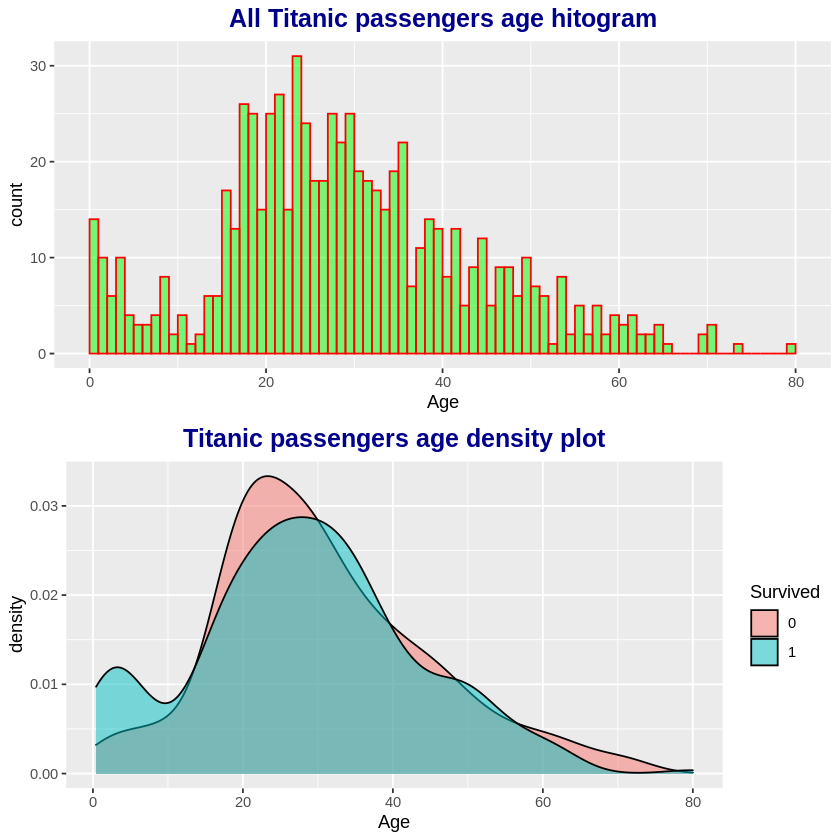

In [14]:
age.p1 <- full %>% 
  ggplot(aes(Age)) + 
  # 히스토그램 그리기, 설정
  geom_histogram(breaks = seq(0, 80, by = 1), # 간격 설정 
                 col    = "red",              # 막대 경계선 색깔 
                 fill   = "green",            # 막대 내부 색깔 
                 alpha  = .5) +               # 막대 투명도 = 50% 
  # Plot title
  ggtitle("All Titanic passengers age hitogram") +
  theme(plot.title = element_text(face = "bold",    # 글씨체 
                                  hjust = 0.5,      # Horizon(가로비율) = 0.5
                                  size = 15, color = "darkblue"))

age.p2 <- full %>% 
  # test data set의 Survived == NA 인 값들 제외 
  filter(!is.na(Survived)) %>% 
  ggplot(aes(Age, fill = Survived)) + 
  geom_density(alpha = .5) +
  ggtitle("Titanic passengers age density plot") + 
  theme(plot.title = element_text(face = "bold", hjust = 0.5,
                                  size = 15, color = "darkblue"))

# multiplot layout 형식 지정
multi.layout = matrix(c(1, 1, 2, 2), 2, 2, byrow = T)

# 위에서 생성한 2개의 그래프 한 화면에 출력 
multiplot(age.p1, age.p2, layout = multi.layout)

# 평균 대치법을 사용해 Age 컬럼의 결측값을 30으로 대체

In [15]:
# 평균 대치법
mean_value<-round(mean(full$Age,na.rm=T))
mean_value

[1] 30

In [16]:
full$Age[is.na(full$Age)]<-mean_value

In [17]:
sum(is.na(full$Age))

[1] 0

In [18]:
head(full)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<fct>,<ord>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,,Q


* Age 컬럼에 결측값이 많이 보이인다.
* Cabin은 is.na()나 missmap에서는 결측이 없는 것으로 보이나 실제로 데이터를 보면 실제 데이터는 거의 없고 공백이 차지하고 있음.
* Age는 다른 데이터를 통해서 추정할 수 있는 경우가 있으나 우선 생략 (단순대치법을 사용해 결측값이 있는 행 삭제)
* Cabin은 결측값이 너무 많으므로 Cabin 컬럼 자체를 제외

> 2-2) 이상값 처리

> Pclass

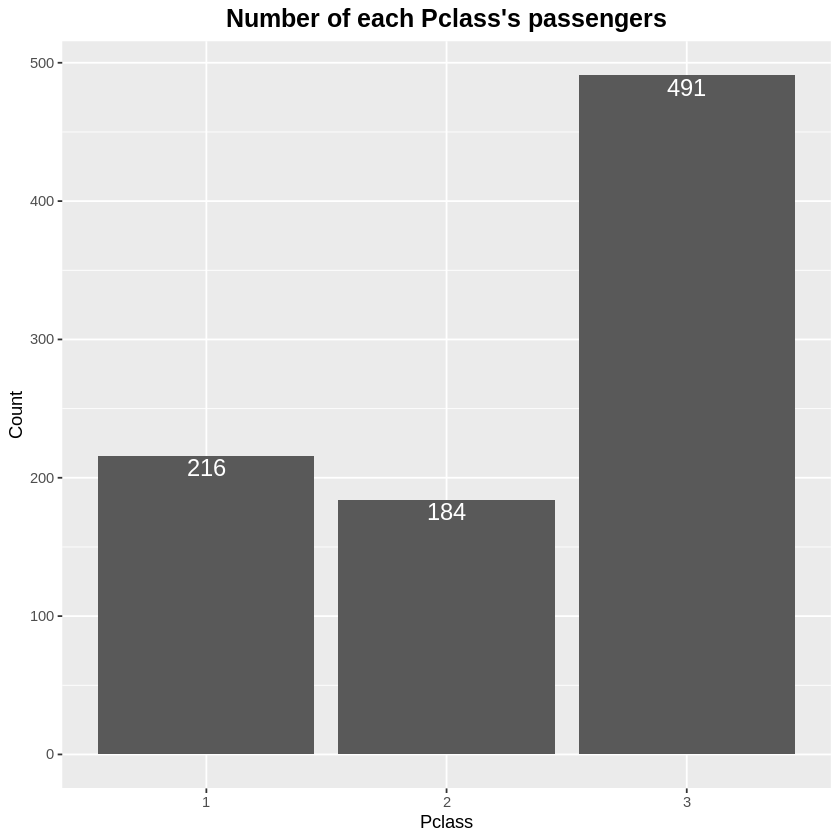

In [19]:
full %>% 
  # dplyr::group_by(), summarize() 를 이용해서 Pclass 빈도수 구하기
  group_by(Pclass) %>% 
  summarize(N = n()) %>% 
  # Aesthetic setting 
  ggplot(aes(Pclass, N)) +
  geom_col() +
  # Pclass 빈도수 plot에 출력 
  geom_text(aes(label = N),        # Plot의 y에 해당하는 N(빈도수)를 매핑
            size = 5,              # 글씨 크기 
            vjust = 1.2,           # vertical(가로) 위치 설정 
            color = "#FFFFFF") +   # 글씨 색깔 : 흰색
  # Plot title 
  ggtitle("Number of each Pclass's passengers") + 
  # Title setting 
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15)) +
  # x, y axis name change  
  labs(x = "Pclass", y = "Count")

> Fare

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



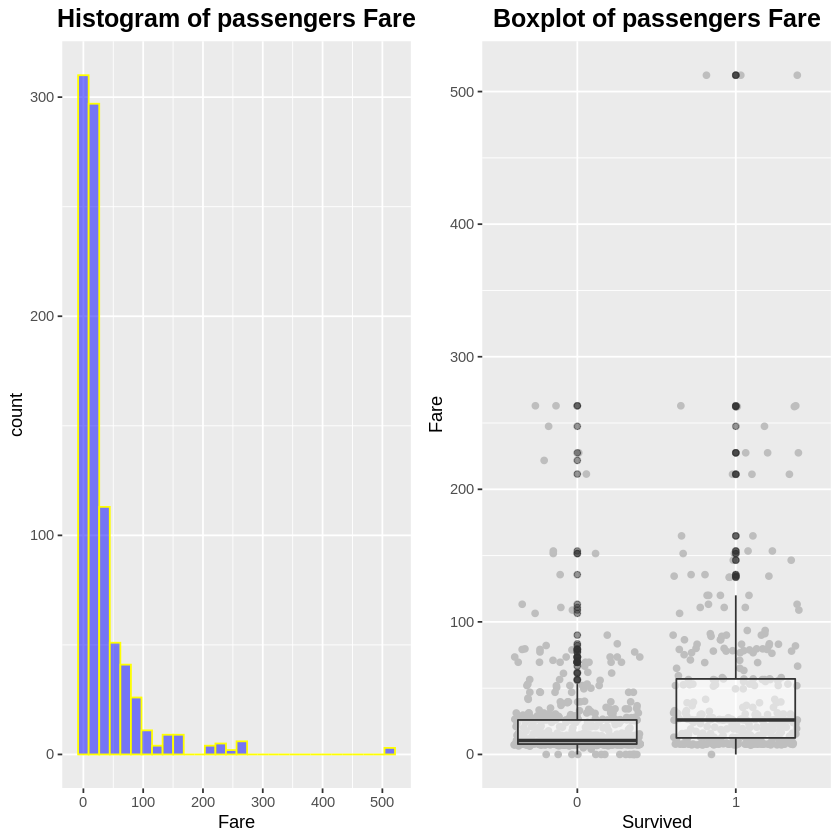

In [20]:
# Histogram 
Fare.p1 <- full %>%
  ggplot(aes(Fare)) + 
  geom_histogram(col    = "yellow",
                 fill   = "blue", 
                 alpha  = .5) +
  ggtitle("Histogram of passengers Fare") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15))

# Boxplot 
Fare.p2 <- full %>%
  filter(!is.na(Survived)) %>% 
  ggplot(aes(Survived, Fare)) + 
  # 관측치를 회색점으로 찍되, 중복되는 부분은 퍼지게 그려줍니다.
  geom_jitter(col = "gray") + 
  # 상자그림 : 투명도 50% 
  geom_boxplot(alpha = .5) + 
  ggtitle("Boxplot of passengers Fare") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15))

# multiplot layout 형식 지정
multi.layout = matrix(c(1, 1, 2, 2), 2, 2)

# 위에서 생성한 2개의 그래프 한 화면에 출력 
multiplot(Fare.p1, Fare.p2, layout = multi.layout)

> Sex

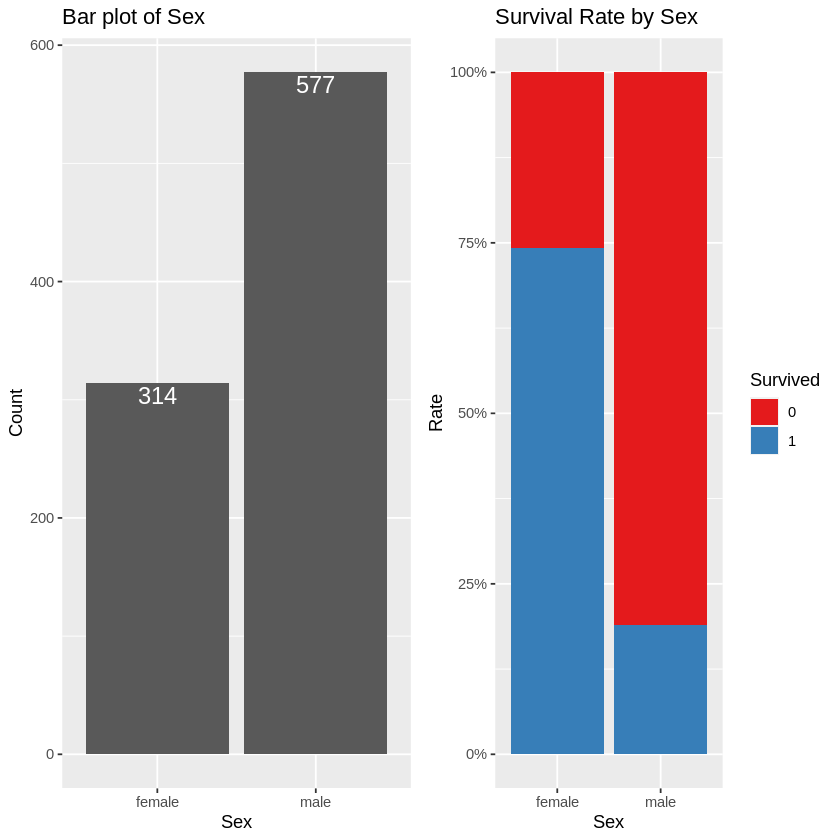

In [21]:
sex.p1 <- full %>% 
  dplyr::group_by(Sex) %>% 
  summarize(N = n()) %>% 
  ggplot(aes(Sex, N)) +
  geom_col() +
  geom_text(aes(label = N), size = 5, vjust = 1.2, color = "#FFFFFF") + 
  ggtitle("Bar plot of Sex") +
  labs(x = "Sex", y = "Count")
  
sex.p2 <- full[1:891, ] %>% 
  ggplot(aes(Sex, fill = Survived)) +
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(labels = percent) +
  ggtitle("Survival Rate by Sex") + 
  labs(x = "Sex", y = "Rate")

multi.layout = matrix(rep(c(1, 2), times = 2), 2, 2, byrow = T)

multiplot(sex.p1, sex.p2, layout = multi.layout)

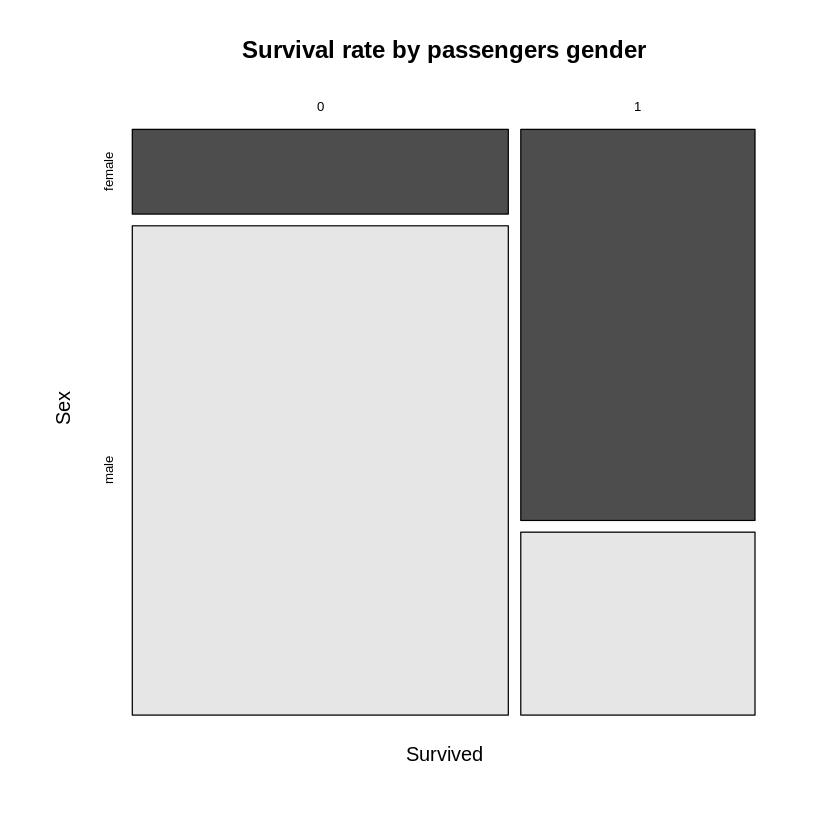

In [22]:
mosaicplot(Survived ~ Sex,
           data = full[1:891, ], col = TRUE,
           main = "Survival rate by passengers gender")

> Feature engineering & Data Pre-processing


> Age -> Age.Group

In [23]:
full <- full %>%
  # 결측치(NA)를 먼저 채우는데 결측치를 제외한 값들의 평균으로 채움.
  mutate(Age = ifelse(is.na(Age), mean(full$Age, na.rm = TRUE), Age),
         # Age 값에 따라 범주형 파생 변수 Age.Group 를 생성
         Age.Group = case_when(Age < 13             ~ "Age.0012",
                               Age >= 13 & Age < 18 ~ "Age.1317",
                               Age >= 18 & Age < 60 ~ "Age.1859",
                               Age >= 60            ~ "Age.60inf"),
         # Chr 속성을 Factor로 변환 
         Age.Group = factor(Age.Group))

> SibSp & Parch -> FamilySized


In [24]:
full <- full %>% 
  # SibSp, Parch와 1(본인)을 더해서 FamilySize라는 파생변수를 먼저 생성  
  mutate(FamilySize = .$SibSp + .$Parch + 1,
         # FamilySize 의 값에 따라서 범주형 파생 변수 FamilySized 를 생성 
         FamilySized = dplyr::case_when(FamilySize == 1 ~ "Single",
                                        FamilySize >= 2 & FamilySize < 5 ~ "Small",
                                        FamilySize >= 5 ~ "Big"),
         # Chr 속성인 FamilySized를 factor로 변환하고
         # 집단 규모 크기에 따라 levels를 새로 지정
         FamilySized = factor(FamilySized, levels = c("Single", "Small", "Big")))


>  Name & Sex -> title

In [25]:
# 우선 Name 열벡터만 추출해서 title 벡터에 저장 
title <- full$Name

# 정규표현식과 gsub()을 이용해서 성별과 관련성이 높은 이름만 추출해서 title 벡터로 저장 
title <- gsub("^.*, (.*?)\\..*$", "\\1", title)

# 위에서 저장한 title 벡터를 다시 full 에 저장하되, title 파생변수로 저장 
full$title <- title

In [26]:
unique(full$title)

[1] "Mr"           "Mrs"          "Miss"         "Master"       "Don"         
 [6] "Rev"          "Dr"           "Mme"          "Ms"           "Major"       
[11] "Lady"         "Sir"          "Mlle"         "Col"          "Capt"        
[16] "the Countess" "Jonkheer"

In [27]:
# 범주별 빈도수, 비율 확인 
descr::CrossTable(full$title)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

|         Capt |          Col |          Don |           Dr |     Jonkheer |
|--------------|--------------|--------------|--------------|--------------|
|            1 |            2 |            1 |            7 |            1 |
|        0.001 |        0.002 |        0.001 |        0.008 |        0.001 |
|--------------|--------------|--------------|--------------|--------------|

|         Lady |        Major |       Master |         Miss |         Mlle |
|--------------|--------------|--------------|--------------|--------------|
|            1 |            2 |           40 |          182 |            2 |
|        0.001 |        0.002 |        0.045 |        0.204 |        0.002 |
|--------------|--------------|--------------|--------------|--------------|

|          Mme |           Mr |          Mrs |           Ms |          Rev |
|--------------|--

In [28]:
# 5개 범주로 단순화 시키는 작업 
full <- full %>%
  # "%in%" 대신 "=="을 사용하게되면 Recyling Rule 때문에 원하는대로 되지 않습니다.
  mutate(title = ifelse(title %in% c("Mlle", "Ms", "Lady", "Dona"), "Miss", title),
         title = ifelse(title == "Mme", "Mrs", title),
         title = ifelse(title %in% c("Capt", "Col", "Major", "Dr", "Rev", "Don",
                                     "Sir", "the Countess", "Jonkheer"), "Officer", title),
         title = factor(title))

# 파생변수 생성 후 각 범주별 빈도수, 비율 확인 
descr::CrossTable(full$title)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

|  Master |    Miss |      Mr |     Mrs | Officer |
|---------|---------|---------|---------|---------|
|      40 |     186 |     517 |     126 |      22 |
|   0.045 |   0.209 |   0.580 |   0.141 |   0.025 |
|---------|---------|---------|---------|---------|


> Ticket -> ticket.size

In [29]:
# 고유한(unique한) 범주의 갯수만 파악하려고 length()를 사용했습니다.
length(unique(full$Ticket))

[1] 681

In [30]:
# 모두 출력하면 너무 지저분해서 10개만 출력했습니다.
head(summary(full$Ticket), 10)

1601       347082     CA. 2343      3101295       347088      CA 2144 
           7            7            7            6            6            6 
      382652 S.O.C. 14879       113760       113781 
           5            5            4            4

In [31]:
full %>% 
  # 티켓이 일치하는 11명의 승객들만 필터링 
  filter(Ticket == "CA. 2343") %>% 
  # 모든 변수에 대해 확인할 필요는 없으므로 아래 변수들만 보려고 합니다.
  select(Pclass, Name, Age, FamilySized)

Pclass,Name,Age,FamilySized
<ord>,<fct>,<dbl>,<fct>
3,"Sage, Master. Thomas Henry",30,Big
3,"Sage, Miss. Constance Gladys",30,Big
3,"Sage, Mr. Frederick",30,Big
3,"Sage, Mr. George John Jr",30,Big
3,"Sage, Miss. Stella Anna",30,Big
3,"Sage, Mr. Douglas Bullen",30,Big
3,"Sage, Miss. Dorothy Edith ""Dolly""",30,Big


In [32]:
# 우선 ticket.unique가 모두 0이라고 저장함
ticket.unique <- rep(0, nrow(full))

# Ticket Feature에서 고유한 것들만 추출해서 tickets 벡터에 저장 
tickets <- unique(full$Ticket)

# 반복문을 중첩 활용해서 티켓이 같은 승객들만 추출 후, 각 티켓들의 길이(문자 갯수)를 추출해서 저장한다.
for (i in 1:length(tickets)) {
  current.ticket <- tickets[i]
  party.indexes <- which(full$Ticket == current.ticket)
    # For loop 중첩 
    for (k in 1:length(party.indexes)) {
    ticket.unique[party.indexes[k]] <- length(party.indexes)
    }
  }

# 위에서 계산한 ticket.unique 을 파생변수로 저장 
full$ticket.unique <- ticket.unique

# ticket.unique에 따라 세가지 범주로 나눠서 ticket.size 변수 생성 
full <- full %>% 
  mutate(ticket.size = case_when(ticket.unique == 1 ~ 'Single',
                                 ticket.unique < 5 & ticket.unique >= 2 ~ "Small",
                                 ticket.unique >= 5 ~ "Big"),
         ticket.size = factor(ticket.size,
                              levels = c("Single", "Small", "Big")))

> Embarked

In [33]:
full$Embarked <- replace(full$Embarked,               # 치환할 Data$feature 지정
                         which(is.na(full$Embarked)), # 결측치들만 찾기
                         'S')                         # 치환할 값 지정 

> Fare

In [34]:
full$Fare <- replace(full$Fare, which(is.na(full$Fare)), 0)

# Data set split

In [35]:
# feature selection 전이므로 우선은 모든 변수들을 선택합니다.
train <- full[1:891, ]

test <- full[892:1309, ]

> Pclass

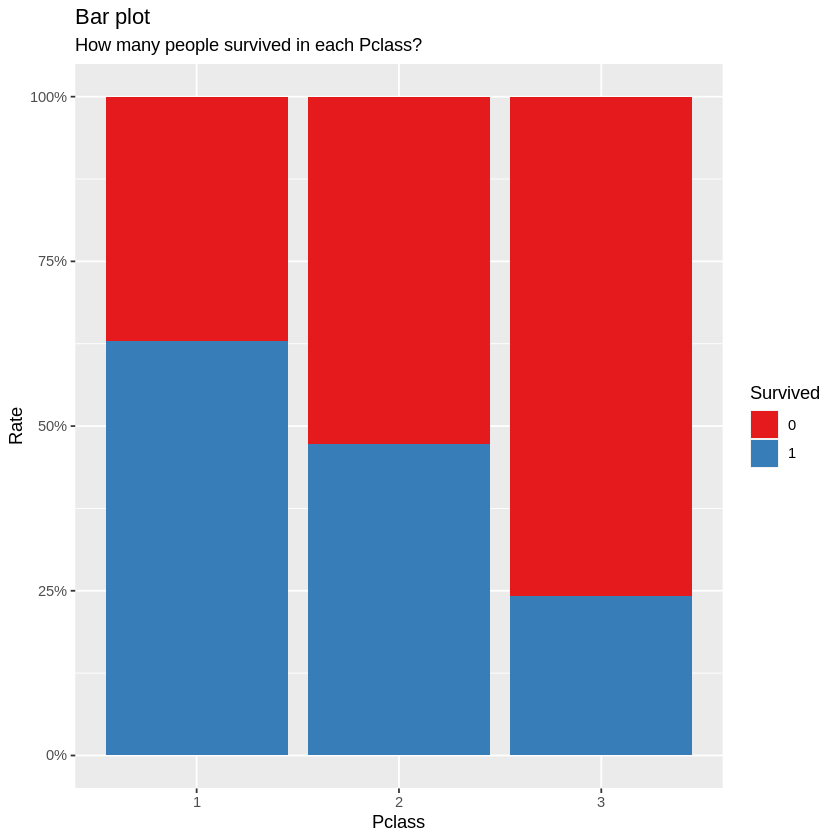

In [36]:
train %>% 
  ggplot(aes(Pclass, fill = Survived)) + 
  geom_bar(position = "fill") +
  # plot 테마 설정 : 조금 더 선명한 색깔로 변환해준다.
  scale_fill_brewer(palette = "Set1") +
  # Y axis setting 
  scale_y_continuous(labels = percent) +
  # x, y 축 이름과 plot의 main title, sub title 설정 
  labs(x = "Pclass", y = "Rate",
       title = "Bar plot", subtitle = "How many people survived in each Pclass?")

> Sex

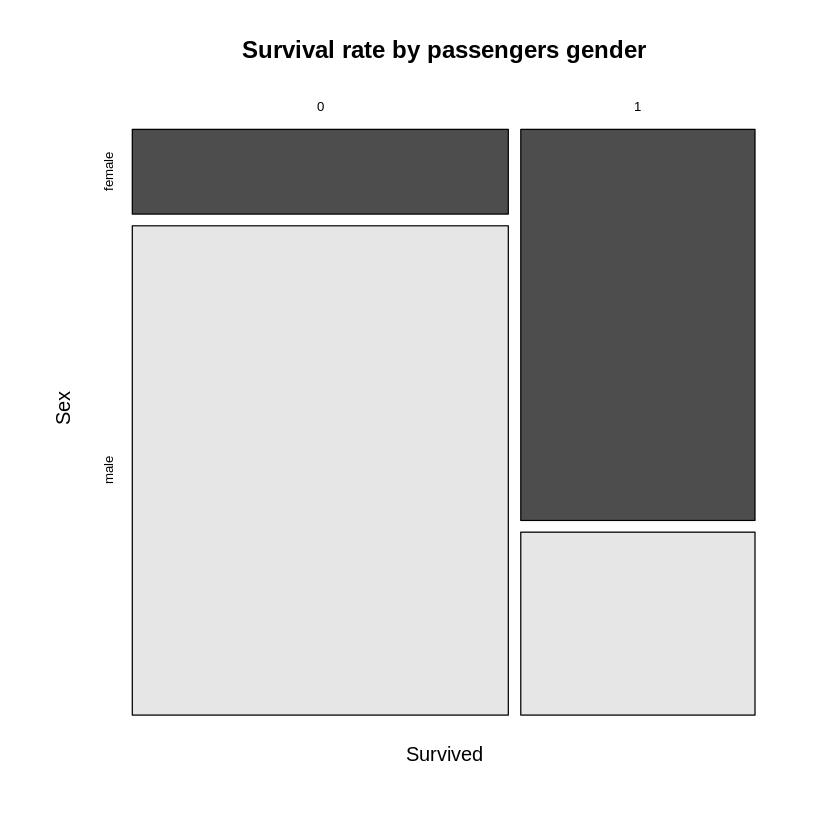

In [37]:
mosaicplot(Survived ~ Sex,
           data = train, col = TRUE,
           main = "Survival rate by passengers gender")


> Embarked

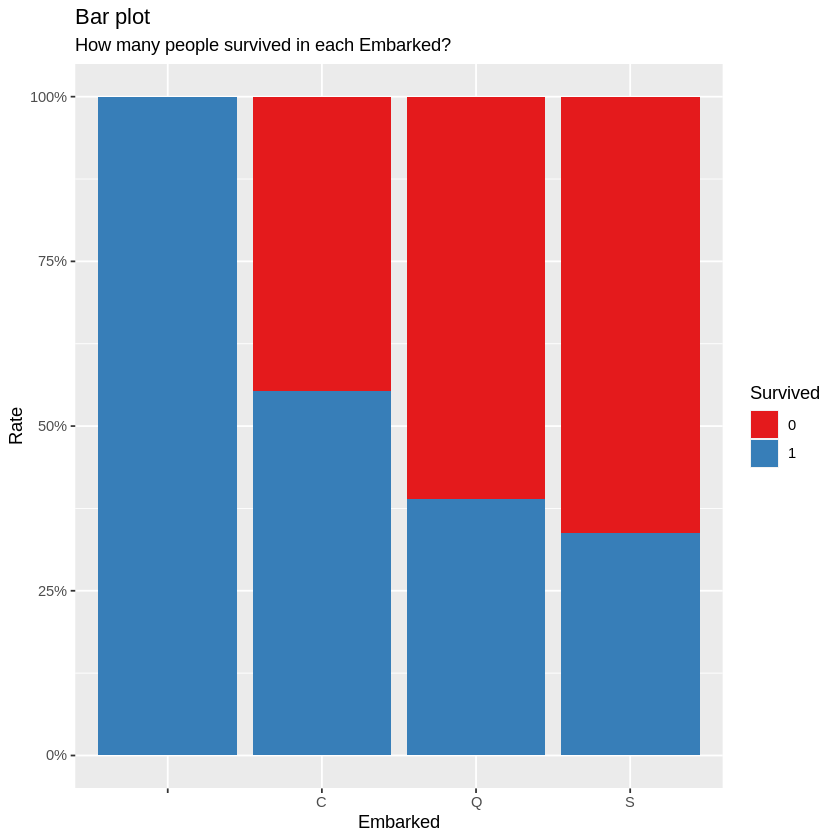

In [38]:
train %>% 
  ggplot(aes(Embarked, fill = Survived)) +
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(labels = percent) +
  labs(x = "Embarked", y = "Rate",
       title = "Bar plot", subtitle = "How many people survived in each Embarked?")

> FamilySized

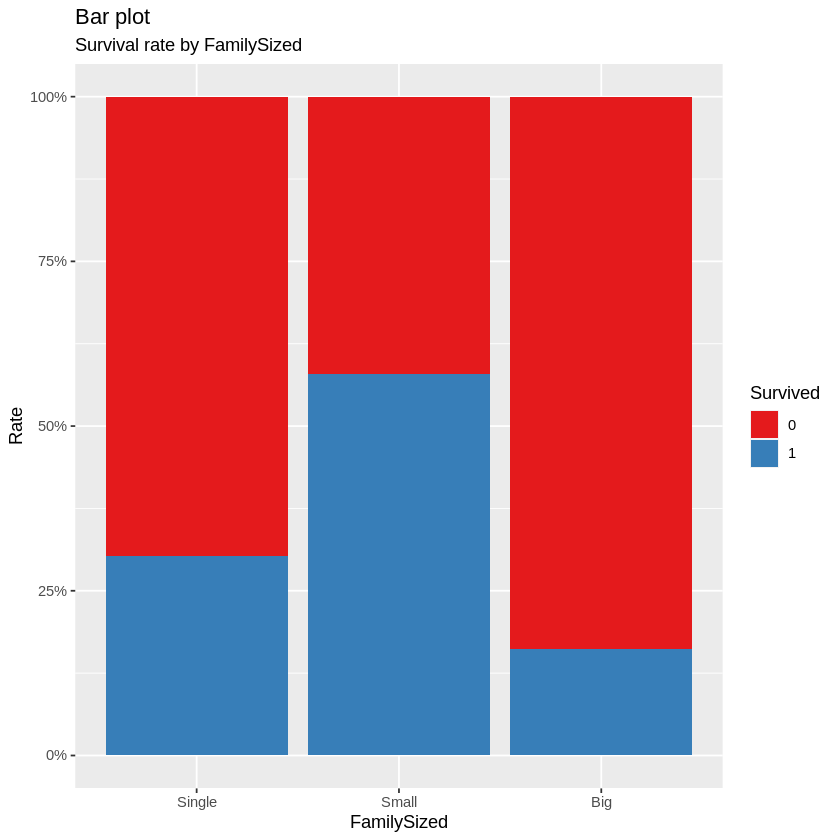

In [39]:
train %>% 
  ggplot(aes(FamilySized, fill = Survived)) + 
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") + 
  scale_y_continuous(labels = percent) +
  labs(x = "FamilySized", y = "Rate",
       title = "Bar plot", subtitle = "Survival rate by FamilySized")

> Age_group

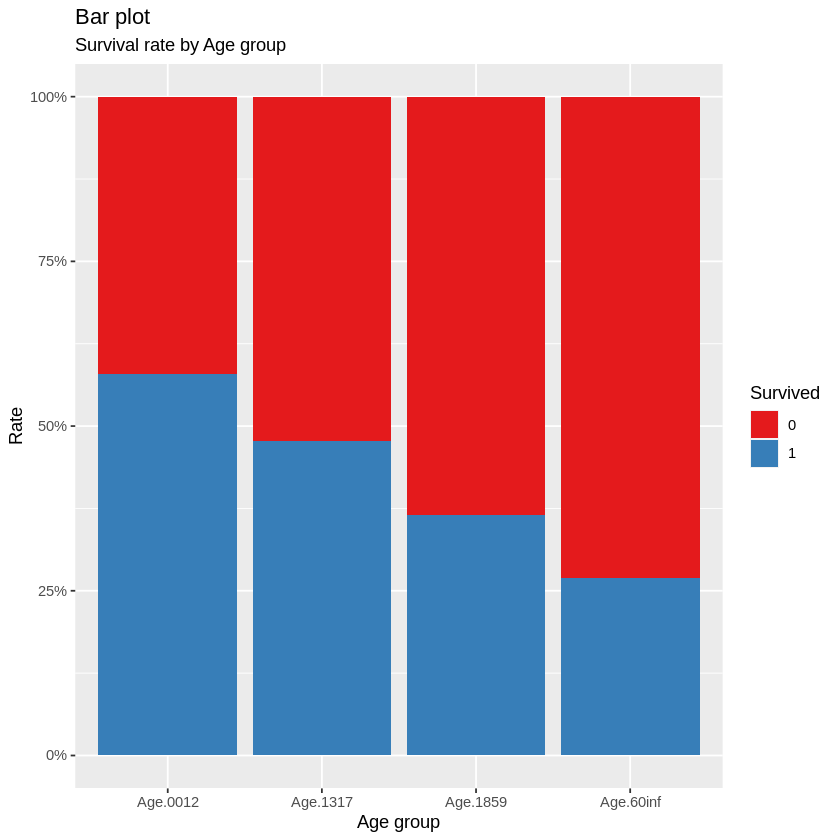

In [40]:
train %>% 
  ggplot(aes(Age.Group, fill = Survived)) + 
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") + 
  scale_y_continuous(labels = percent) +
  labs(x = "Age group", y = "Rate",
       title = "Bar plot", subtitle = "Survival rate by Age group")

> title

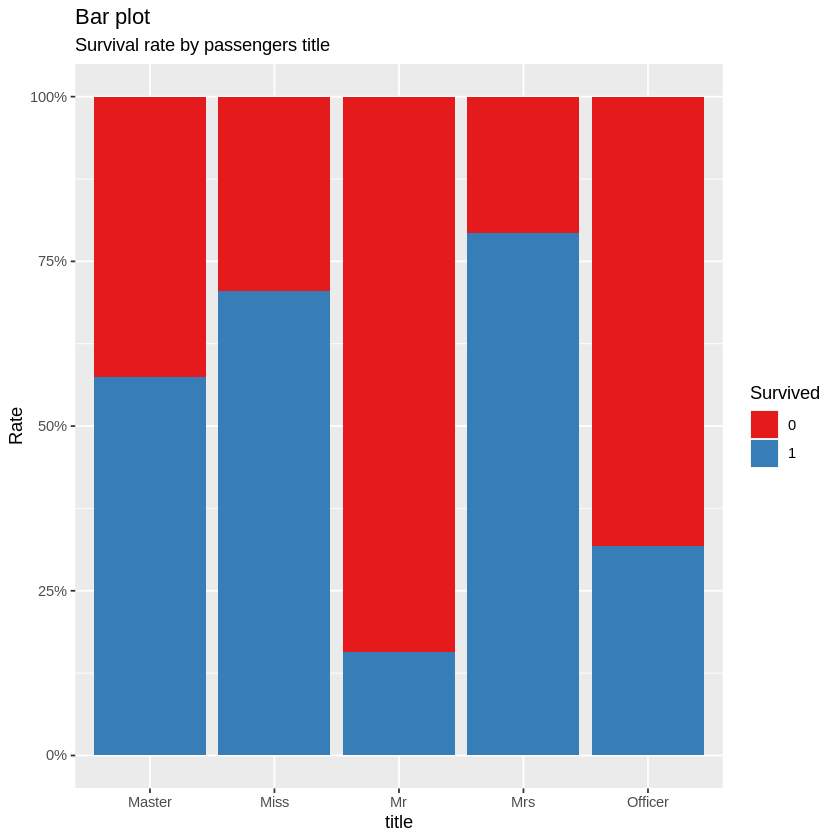

In [41]:
train %>% 
  ggplot(aes(title, fill = Survived)) + 
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") + 
  scale_y_continuous(labels = percent) +
  labs(x = "title", y = "Rate",
       title = "Bar plot", subtitle = "Survival rate by passengers title")

> ticket.size

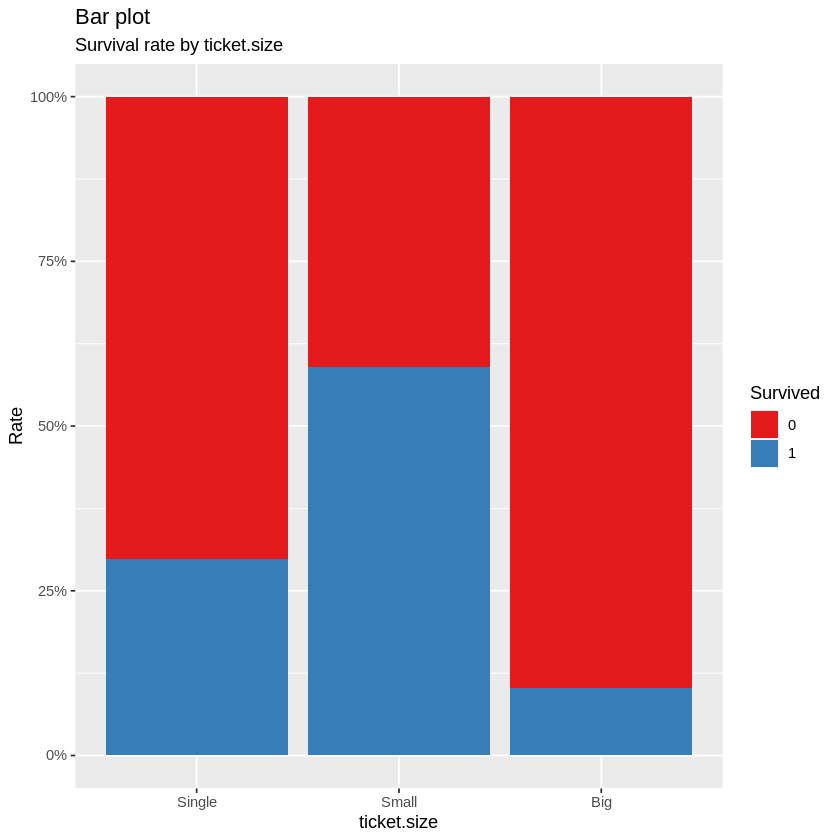

In [42]:
train %>% 
  ggplot(aes(ticket.size, fill = Survived)) + 
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") + 
  scale_y_continuous(labels = percent) +
  labs(x = "ticket.size", y = "Rate",
       title = "Bar plot", subtitle = "Survival rate by ticket.size")

# 데이터 분리

In [43]:
# Id number 제외하고 실제로 사용할 7개 입력변수와 1개의 타겟변수를 선택, 저장 
train <- train %>% 
  select("Pclass", "Sex", "Embarked", "FamilySized",
         "Age.Group", "title", "ticket.size", "Survived")

# Submit을 위해서 Id 열벡터 추출해서 ID에 저장 
ID <- test$PassengerId

# Id와 Survived를 제외한 나머지 6개 변수들을 선택, 저장 
test <- test %>% 
  select("Pclass", "Sex", "Embarked", "FamilySized",
         "Age.Group", "title", "ticket.size")

In [44]:
# 재현성을 위해서 seed number를 설정해줍니다.
set.seed(1901)

In [45]:
result <- glm(Survived ~ ., data = train, family = "binomial")
summary(result)



Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4498  -0.5587  -0.3891   0.5589   2.4743  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         29.89041  881.73299   0.034   0.9730    
Pclass.L            -1.49063    0.18708  -7.968 1.61e-15 ***
Pclass.Q             0.08534    0.19780   0.431   0.6661    
Sexmale            -15.25519  623.95262  -0.024   0.9805    
EmbarkedC          -11.60945  623.00554  -0.019   0.9851    
EmbarkedQ          -11.63550  623.00560  -0.019   0.9851    
EmbarkedS          -12.00187  623.00552  -0.019   0.9846    
FamilySizedSmall    -0.31260    0.27686  -1.129   0.2589    
FamilySizedBig      -2.66458    0.56663  -4.703 2.57e-06 ***
Age.GroupAge.1317   -0.07973    0.65520  -0.122   0.9032    
Age.GroupAge.1859   -0.56360    0.50021  -1.127   0.2599    
Age.GroupAge.60inf  -1.29254    0.76931  -1.680   0.0929 .  
titleMis

> p-value

In [46]:
1 - pchisq(1186.7, df=890)

[1] 8.283785e-11

In [47]:
1 - pchisq(713.3, df=873)
# p-value는 0.999976221145544로 유의수준 0.05하에서 기각 불가
# 따라서 독립변수들이 포함된 모형은 완전모형에 가깝다.

[1] 0.9999762

# 로지스틱 회귀분석 해설 및 꼭 알아야할 개념


### 오즈 => 로짓변환 => 시그모이드함수

## 1) 오즈(Odds)
* 오즈란 성공할 확률이 실패할 확률의 몇 배인지를 나타내는 값이다. 로지스틱 회귀분석에서 이 오즈를 사용하여 각 범주(집단)에 분류될 획률 값을 추정한다.
* 예를 들어， 제비를 뽑아 4번의 성공과 1 번의 실패를 경험하였다면 오즈는 4/1 = 4다

## 2) 로짓변환
* 오즈에 로그값을 취한 것
* 로지스틱 회귀분석의 값을 0, 1만 있으므로 그것에 맞게 그래프를 구부려주는 역할

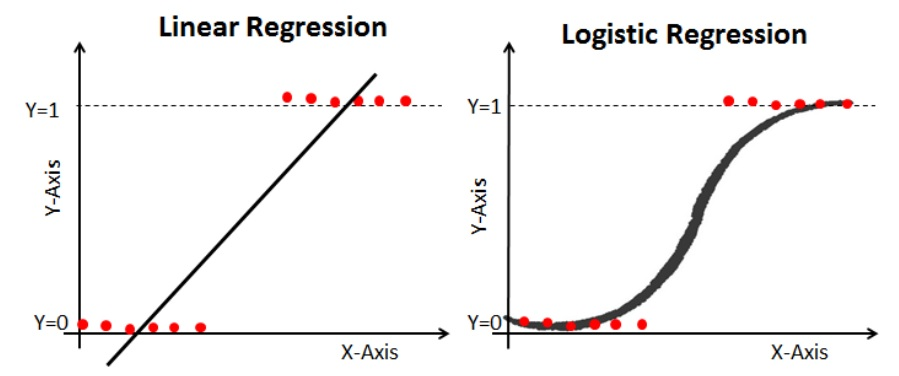

## 3) 시그모이드 함수
* 선형 회귀분석의 결과로 도출되는 직선을**로짓변환**하여 양 끝이 구부러진 S자 모양의 그래프 형태가 나오는 함수

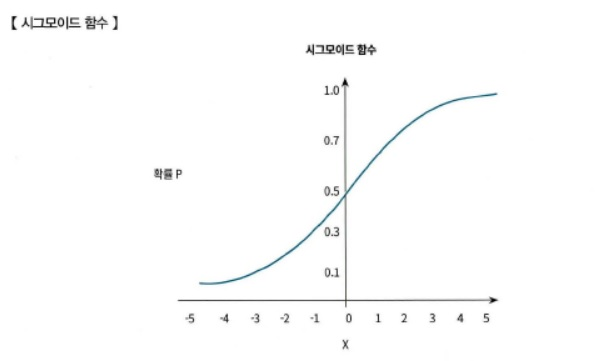

## 4) 오즈(Odds) 계산법
* 성공횟수 / 실패횟수 = odds
* 성공횟수 10번 / 실패횟수 1번 = 10
* 성공횟수 10번 / 실패횟수 2번 = 5

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



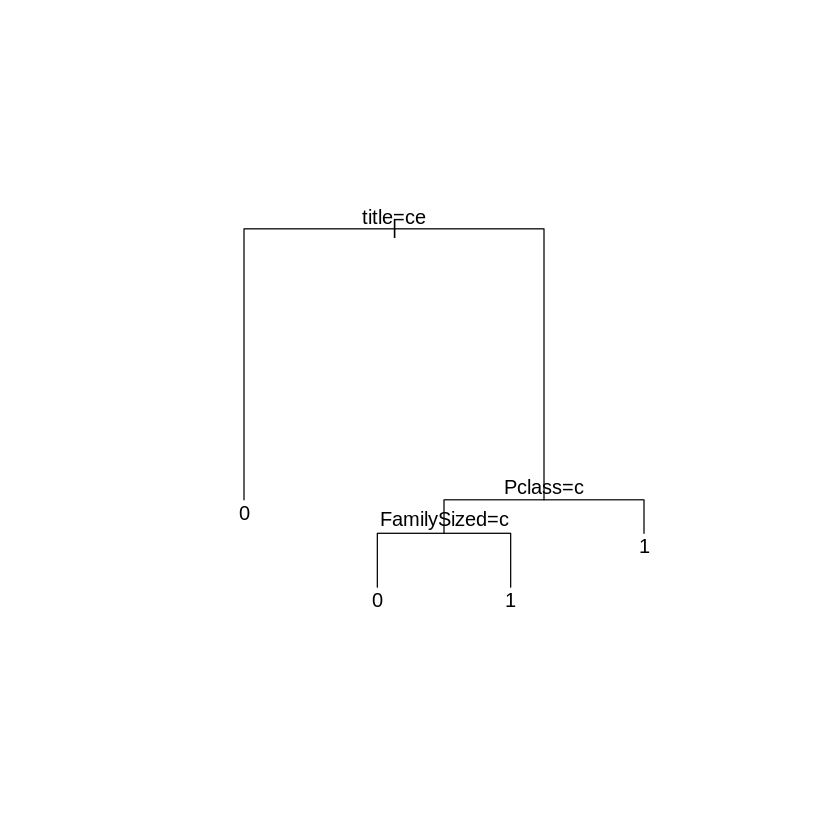

In [48]:
# 의사결정나무 구축
install.packages('rpart')
library(rpart)
result<-rpart(data=train,Survived ~.)
# 시각화
plot(result,margin=0.3)
text(result)